In [0]:
import numpy as np
import scipy.io as sio 
import matplotlib.pyplot as plt
from numpy.linalg import svd


In [0]:
noise = sio.loadmat('/content/Image_anomaly.mat')

In [0]:
M = noise['X']

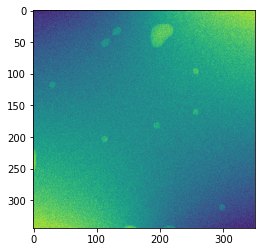

In [7]:
plt.imshow(M)

In [0]:
S0 = np.zeros(M.shape)
Y0 = np.zeros(M.shape)

In [0]:
mu = 1.25/(np.linalg.norm(M))
l = 0.001
error =[]

In [0]:
for i in range(0, 1000):
  # Given  S and Y , update L
  X = M - S0 + Y0/mu
  u, s, v = svd(X, full_matrices=False)
  s_t = np.where((s-1/mu) <0, 0, s)
  L0 = np.dot(u*s_t, v)

  ## Given L, Y, update S

  X = M - L0 + Y0/mu
  abs_X = np.abs(X) - l/mu
  max_abs_X = np.where(abs_X <0,0, abs_X)
  sign_X = np.sign(X)
  S0 = np.multiply(sign_X, max_abs_X)

  ## Given L, S update Y
  Y = Y0 + mu * (M - L0 - S0)
  Y0 = Y

  


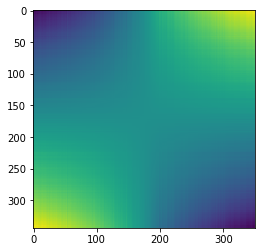

In [71]:
plt.imshow(L0)